

**TRAIN MODEL**



Importing Dataset


In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

Data Preprocessing


Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/fruit recognition dataset/Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6269 files belonging to 24 classes.



Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit recognition dataset/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3124 files belonging to 24 classes.


Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:

cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [ ]:

#Output Layer
cnn.add(tf.keras.layers.Dense(units=24,activation='softmax'))

Compiling and Training Phase


In [ ]:

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)


Epoch 1/32
196/196 [==============================] - 2472s 12s/step - loss: 4.0644 - accuracy: 0.4715 - val_loss: 0.2607 - val_accuracy: 0.9091
Epoch 2/32
196/196 [==============================] - 208s 1s/step - loss: 0.3666 - accuracy: 0.8757 - val_loss: 0.1078 - val_accuracy: 0.9549
Epoch 3/32
196/196 [==============================] - 185s 938ms/step - loss: 0.2035 - accuracy: 0.9311 - val_loss: 0.1586 - val_accuracy: 0.9389
Epoch 4/32
196/196 [==============================] - 193s 975ms/step - loss: 0.1802 - accuracy: 0.9376 - val_loss: 0.0105 - val_accuracy: 0.9974
Epoch 5/32
196/196 [==============================] - 192s 975ms/step - loss: 0.0926 - accuracy: 0.9708 - val_loss: 0.0403 - val_accuracy: 0.9843
Epoch 6/32
196/196 [==============================] - 206s 1s/step - loss: 0.0927 - accuracy: 0.9705 - val_loss: 0.0243 - val_accuracy: 0.9917
Epoch 7/32
196/196 [==============================] - 190s 962ms/step - loss: 0.1124 - accuracy: 0.9649 - val_loss: 0.0275 - val_ac

Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

196/196 [==============================] - 55s 276ms/step - loss: 8.5568e-04 - accuracy: 0.9998
Training accuracy: 0.999840497970581


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

98/98 [==============================] - 31s 304ms/step - loss: 0.0015 - accuracy: 0.9997
Validation accuracy: 0.9996799230575562


Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history


{'loss': [4.064446926116943,
  0.36663734912872314,
  0.20350170135498047,
  0.1802411824464798,
  0.09257623553276062,
  0.09272700548171997,
  0.11243749409914017,
  0.07443465292453766,
  0.04553139582276344,
  0.06079288572072983,
  0.08255771547555923,
  0.2191469371318817,
  0.03611467033624649,
  0.07680167257785797,
  0.038500960916280746,
  0.021755516529083252,
  0.07465819269418716,
  0.06787704676389694,
  0.04880634695291519,
  0.02275543473660946,
  0.14237907528877258,
  0.062106095254421234,
  0.07185468822717667,
  0.005114791449159384,
  0.06511808186769485,
  0.028154851868748665,
  0.10497817397117615,
  0.03405710682272911,
  0.07859686017036438,
  0.053559646010398865,
  0.053709838539361954,
  0.039092209190130234],
 'accuracy': [0.471526563167572,
  0.8757377862930298,
  0.931089460849762,
  0.9376295804977417,
  0.970808744430542,
  0.9704897403717041,
  0.9649066925048828,
  0.9767107963562012,
  0.9854841232299805,
  0.9813367128372192,
  0.9818152785301208,


In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 99.96799230575562 %


Accuracy Visualization

Training Visualization

In [ ]:
#training_history.history['accuracy']


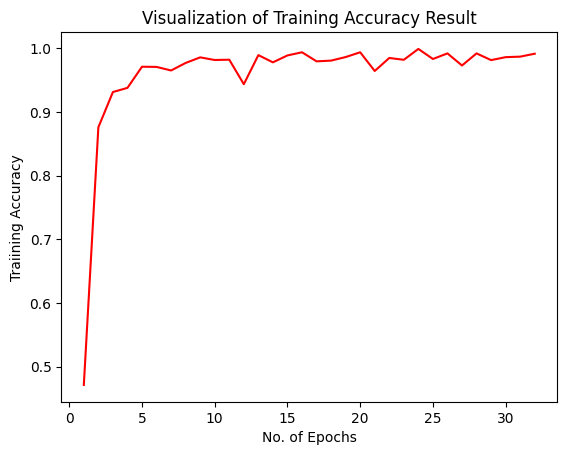

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy


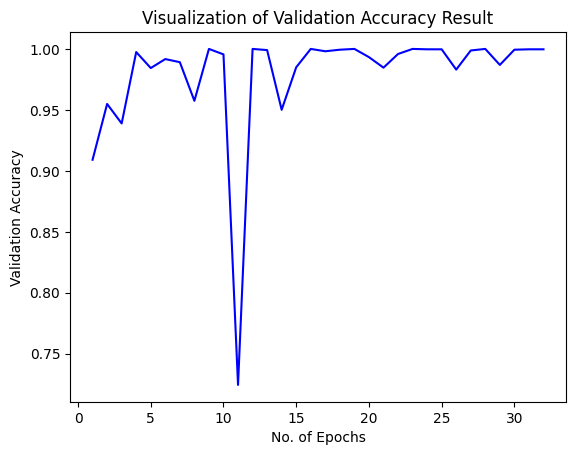

In [ ]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit recognition dataset/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3110 files belonging to 24 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

98/98 [==============================] - 710s 6s/step - loss: 0.0012 - accuracy: 0.9997
Test accuracy: 0.9996784329414368


**TEST MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Test set Image Processing

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit recognition dataset/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3110 files belonging to 24 classes.


Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

Visualising and Performing Prediction on Single image

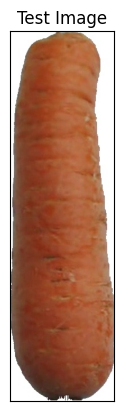

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/fruit recognition dataset/Test/carrot_1/r0_103.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 175ms/step


In [ ]:
print(predictions)


[[5.6397077e-14 1.9625935e-15 5.4985584e-13 4.8443112e-14 8.5600662e-19
  2.4620719e-18 2.8943546e-17 2.2892410e-15 7.3171894e-12 3.5323372e-10
  2.2302134e-15 4.2856148e-17 1.9071799e-12 8.2167563e-13 3.4516913e-16
  2.3774097e-17 1.0000000e+00 1.9194815e-09 4.1863877e-09 3.9464204e-14
  2.8468279e-19 6.3869084e-18 1.4307183e-16 4.7944746e-09]]


In [ ]:
# test_set.class_names


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

16


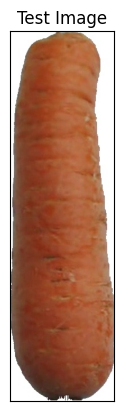

In [ ]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
s#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a carrot_1
